# PERCEPTRON

## Configurações Iniciais

Pacotes que serão usados para importação do *dataset*, separação dos dados em treinamento e teste, método de classificação *Perceptron* e as métricas para análise de desempenho.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn import datasets
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [2]:
#DEFININDO ALGUNS PARÂMETROS PARA PLOTAR GRÁFICOS
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {'figure.figsize': [7, 4], 
          'axes.labelsize': 12,
          'axes.titlesize':16, 
          'font.size': 12,
          'legend.fontsize': 12, 
          'xtick.labelsize': 10, 
          'ytick.labelsize': 10
         }

plt.rcParams.update(params)

## Dataset

Importação do dataset *Breast Cancer Wisconsin*.

In [3]:
dataset = datasets.load_breast_cancer()

Atribuição dos dados de entrada a variável X e dos elementos *target* a variável y.

Obs.: O elemento *target* do dataset é distribuído em valores 0 e 1, onde 0 representa o diagnóstico de câncer benigno e 1 o câncer maligno.

In [8]:
x = dataset.data
y = dataset.target

Imprimindo o formato de ambas variáveis geradas.

## Comparações

A célula abaixo contém a classe do Perceptron implementado pela equipe.

In [9]:
class PerceptronImplementado:        
    
    def predizerDado(self, dado):        
        # Tenho que ir somando cada dimensão do dado de entrada com o respectivo peso
        soma = 0.0
        
        # Passando por cada dimensão e somando as multiplicações
        for valorDadoDimensao, pesoDimensao in zip(dado, self.vetorPesos):
            soma += valorDadoDimensao * pesoDimensao

        # Retorna classe 1 se a soma der >= 0 e classe 0 caso contrário
        if soma >= 0:
            return 1
        else:
            return 0
        
    def calcularAcuracia(self, x, y):
        
        qtdAcertos = 0

        # Passando por cada dado para predizer sua classe e comparar com a real
        for dadoAtual, classeReal in zip(x, y):

            # Fazendo a predição
            classePredita = self.predizerDado(dadoAtual)

            # Se acertei, então somo 1 em qtdAcertos
            if classePredita == classeReal:
                qtdAcertos += 1

        # Retorno a porcentagem de acertos
        return qtdAcertos / float(len(x))

        
    def treinarPesos(self, x, y, qtdMaxIteracoes = 10000, taxaAprendizagem = 0.5):
        
        # Irei alterar o valor dos pesos no máximo qtdMaxIteracoes vezes
        for i in range(qtdMaxIteracoes):

            # Primeiro calculo a acurácia atual para ver se já posso parar o algoritmo
            acuraciaAtual = self.calcularAcuracia(x, y)

            # Se já cheguei em 100%, então posso parar as iterações
            if acuraciaAtual == 1:
                break

            # Senão, vou passar por cada dado para fazer a predição, calcular o erro e arrumar os pesos
            for dadoAtual, classeReal in zip(x, y):

                # Fazendo a predição e calculando o erro
                classePredita = self.predizerDado(dadoAtual)
                erro = classeReal - classePredita

                # Se houve erro, então recalculo todos os pesos
                if erro != 0:
                    for index, pesoAtual in enumerate(self.vetorPesos):
                        self.vetorPesos[index] = pesoAtual + taxaAprendizagem * erro * dadoAtual[index]
    
    
    def treinarPerceptron(self, xTrain, yTrain, qtdMaxIteracoes = 10000, taxaAprendizagem = 0.5):
        # Transformando tudo pra numpy (assim funciona com datasets reais)
        xTrain = np.array(xTrain)
        yTrain = np.array(yTrain)
        
        # A primeira coisa a fazer é colocar o bias no final de cada dado
        for dadoAtual in xTrain:
            np.append(dadoAtual, 1)
        
        # Começando com pesos aleatórios entre -1 e 1 e fazendo o treinamento
        self.vetorPesos = []

        # Pesos aleatórios para cada dimensão
        for i in range(len(xTrain[0])):
            self.vetorPesos.append(randint(-1000, 1000) / 1000)

        # Treinando
        self.treinarPesos(xTrain, yTrain, qtdMaxIteracoes, taxaAprendizagem)
        
    
    def predizerDados(self, xTest):
        # Transformando tudo pra numpy (assim funciona com datasets reais)
        xTest = np.array(xTest)
        
        # Essa função faz a predição de n dados usando a função predizerDado (atenção no plural e singular)
        yPred = []
        
        for dadoAtual in xTest:
            # Tenho que colocar o bias no final
            np.append(dadoAtual, 1)
            yPred.append(self.predizerDado(dadoAtual))
            
        return yPred

## Usando K-Fold Cross Validation para analisar o algoritmo implementado e o do Sklearn

Antes de fazer as comparações, é de extrema importância manter os parâmetros do algoritmo implementado e os do Sklearn iguais. A célula abaixo contém os parâmetros em comum dos dois códigos.

In [10]:
# Para os perceptrons
taxaAprendizagem = 0.5
maxIteracoes = 1000

# Para o KFold
qtdPacotesKFold = 10

In [11]:
objPerceptronImplementado = PerceptronImplementado()
objPerceptronSklearn = Perceptron(eta0=taxaAprendizagem, max_iter=maxIteracoes)

#Instânciando um objeto KFold com 10 pacotes
objKFold = KFold(n_splits = qtdPacotesKFold, shuffle=True)

#Vetores de métricas para o algoritmo implementado
vetorAcuraciasImplementado = []
vetorF1Implementado = []
vetorPrecisaoImplementado = []
vetorRecallImplementado = []

#Vetores de métricas para o algoritmo do sklearn
vetorAcuraciasSklearn = []
vetorF1Sklearn = []
vetorPrecisaoSklearn = []
vetorRecallSklearn = []

#Rodando o Perceptron com o KFold
i = 0
for trainIndex, testIndex in objKFold.split(x):
    
    # Separando os dados de treinamento e teste
    i += 1
    xTrain, xTest, yTrain, yTest = x[trainIndex], x[testIndex], y[trainIndex], y[testIndex]
    
    # Treinando o perceptron implementado e o do sklearn
    objPerceptronImplementado.treinarPerceptron(xTrain, yTrain, qtdMaxIteracoes=maxIteracoes)
    objPerceptronSklearn.fit(xTrain, yTrain)
    
    # Predizendo os dados de teste
    yPredImplementado = objPerceptronImplementado.predizerDados(xTest)
    yPredSklearn = objPerceptronSklearn.predict(xTest)
    
    # Verificando métricas no algoritmo implementado
    vetorAcuraciasImplementado.append(accuracy_score(yTest, yPredImplementado))
    vetorF1Implementado.append(f1_score(yTest, yPredImplementado, average='binary'))
    vetorPrecisaoImplementado.append(precision_score(yTest, yPredImplementado, average='binary'))
    vetorRecallImplementado.append(recall_score(yTest, yPredImplementado, average='binary'))
    
    # Verificando metricas no Sklearn
    vetorAcuraciasSklearn.append(accuracy_score(yTest, yPredSklearn))
    vetorF1Sklearn.append(f1_score(yTest, yPredSklearn, average='binary'))
    vetorPrecisaoSklearn.append(precision_score(yTest, yPredSklearn, average='binary'))
    vetorRecallSklearn.append(recall_score(yTest, yPredSklearn, average='binary'))
    
    print("Iteração", i, "finalizada")

Iteração 1 finalizada
Iteração 2 finalizada
Iteração 3 finalizada
Iteração 4 finalizada
Iteração 5 finalizada
Iteração 6 finalizada
Iteração 7 finalizada
Iteração 8 finalizada
Iteração 9 finalizada
Iteração 10 finalizada


## Analisando as Métricas

### Acurácia

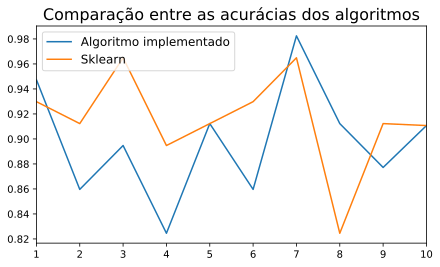

Acurácia média do algoritmo implementado: 0.8980889724310778
Acurácia média do Perceptron do Sklearn: 0.9156328320802005


In [12]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasImplementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorAcuraciasSklearn, label="Sklearn")
plt.title("Comparação entre as acurácias dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoPerceptronAcuracia.png', format='png')
plt.show()

print("Acurácia média do algoritmo implementado:", np.mean(vetorAcuraciasImplementado))
print("Acurácia média do Perceptron do Sklearn:", np.mean(vetorAcuraciasSklearn))

### F1 Score

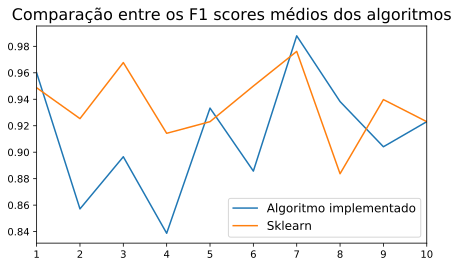

Média do F1 score médio do algoritmo implementado: 0.9124861802032969
Média do F1 score médio do Perceptron do Sklearn: 0.9351943021537352


In [13]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Implementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorF1Sklearn, label="Sklearn")
plt.title("Comparação entre os F1 scores médios dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoPerceptronF1Score.png', format='png')
plt.show()

print("Média do F1 score médio do algoritmo implementado:", np.mean(vetorF1Implementado))
print("Média do F1 score médio do Perceptron do Sklearn:", np.mean(vetorF1Sklearn))

### Precisão

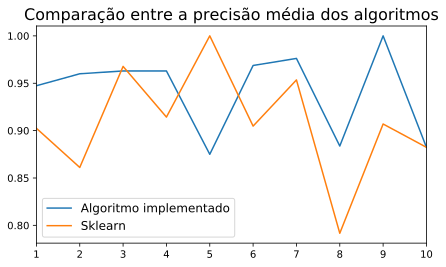

Média da precisão média do algoritmo implementado: 0.9419308694578064
Média da precisão média do Sklearn: 0.9084824414155053


In [14]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoImplementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorPrecisaoSklearn, label="Sklearn")
plt.title("Comparação entre a precisão média dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoPerceptronPrecisao.png', format='png')
plt.show()

print("Média da precisão média do algoritmo implementado:", np.mean(vetorPrecisaoImplementado))
print("Média da precisão média do Sklearn:", np.mean(vetorPrecisaoSklearn))

### Recall

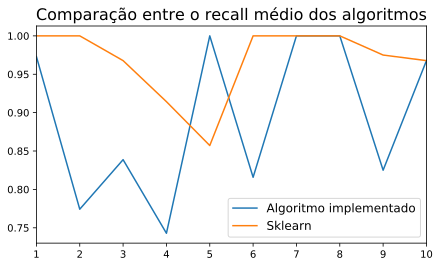

Média do recall médio do algoritmo implementado: 0.893726475080465
Média do recall médio do Sklearn: 0.9681912442396314


In [15]:
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallImplementado, label="Algoritmo implementado")
plt.plot(range(1, qtdPacotesKFold + 1), vetorRecallSklearn, label="Sklearn")
plt.title("Comparação entre o recall médio dos algoritmos")
plt.xlim(1,qtdPacotesKFold)
plt.legend()
plt.savefig('comparacaoPerceptronRecall.png', format='png')
plt.show()

print("Média do recall médio do algoritmo implementado:", np.mean(vetorRecallImplementado))
print("Média do recall médio do Sklearn:", np.mean(vetorRecallSklearn))